In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from stepwise_regression import step_reg
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, TheilSenRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, IsolationForest, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df_bp = pd.read_excel('F:\DATA SCIENCE\ДАТАСЕТы\ВКР (базовая)/X_bp.xlsx')
df_nup = pd.read_excel('F:\DATA SCIENCE\ДАТАСЕТы\ВКР (базовая)/X_nup.xlsx')

In [3]:
df = pd.merge(df_bp, df_nup, how='inner', on='Unnamed: 0')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.index.rename('index', inplace=True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
index,,,,,,,,,,,,,
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [5]:
df.describe(include='all').round(1)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0
mean,2.9,1975.7,739.9,110.6,22.2,285.9,482.7,73.3,2466.9,218.4,44.3,6.9,57.2
std,0.9,73.7,330.2,28.3,2.4,40.9,281.3,3.1,485.6,59.7,45.0,2.6,12.4
min,0.4,1731.8,2.4,17.7,14.3,100.0,0.6,64.1,1036.9,33.8,0.0,0.0,0.0
25%,2.3,1924.2,500.0,92.4,20.6,259.1,266.8,71.2,2135.9,179.6,0.0,5.1,49.8
50%,2.9,1977.6,739.7,110.6,22.2,285.9,451.9,73.3,2459.5,219.2,0.0,6.9,57.3
75%,3.6,2021.4,961.8,129.7,24.0,313.0,693.2,75.4,2767.2,257.5,90.0,8.6,64.9
max,5.6,2207.8,1911.5,199.0,33.0,413.3,1399.5,82.7,3848.4,414.6,90.0,14.4,104.0


### Рассматривается модуль упругости при растяжении

1 Переименование целевой переменной

In [6]:
df['y_1'] = df['Модуль упругости при растяжении, ГПа']
df = df.drop(columns=['Модуль упругости при растяжении, ГПа'])

2 Фильтрация шума с помощью маски (ядра) на основе исходного датасета (первые 23 строки)

In [7]:
sc = RobustScaler()    # MinMaxScaler()    RobustScaler()    StandardScaler()
cols = [col for col in df.columns]
df[cols] = sc.fit_transform(df[cols])

main_y = df.loc[:22, 'y_1']
other_y = df.loc[23:, 'y_1']
selected_rows = pd.DataFrame(columns=df.columns)

# Отбираем по knn ближайших соседей для каждого объекта базового датасета - первых 23 строк
knn = 5
for y in main_y:
    distances = euclidean_distances(df.iloc[23:], df.iloc[:23].loc[df['y_1'] == y])
    indices = np.argsort(distances, axis=0)[:knn]
    selected_rows = selected_rows.append(df.iloc[indices.flatten() + 23])
    
df = pd.concat([df.loc[:22], selected_rows]).drop_duplicates()

# Второй вариант кода фильтрации шума 
# selected_rows = []

# for x in range(23):
#     distances = euclidean_distances(df.iloc[x:x+1, :], df.iloc[23:, :]).flatten()
#     selected_rows.extend(list(distances.argsort()[:knn] + 23))

# df = df.loc[list(range(23)) + selected_rows].drop_duplicates()

df[cols] = sc.inverse_transform(df[cols])

print(df.shape)
df.sort_index()

(108, 13)


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,y_1
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,3000.000000,220.000000,0.0,4.000000,57.000000,70.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,3000.000000,220.000000,0.0,4.000000,60.000000,70.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,3000.000000,220.000000,0.0,4.000000,70.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,3000.000000,220.000000,0.0,5.000000,47.000000,70.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,3000.000000,220.000000,0.0,5.000000,57.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,3.112639,1977.562320,749.517232,115.389521,18.576797,304.533286,581.932326,2351.873255,126.075224,90.0,5.612082,58.655072,73.537663
991,1.951224,1992.644115,661.574467,114.162319,23.091374,273.535419,833.694774,2518.310162,187.671301,90.0,3.608573,46.009743,73.623395
1004,1.580433,2038.289409,767.897075,83.191553,25.627620,249.612303,774.578473,2768.839085,266.956745,90.0,2.751101,63.681745,71.279418
1005,3.810614,1962.945629,464.504503,106.878545,23.581907,268.455146,396.246147,2691.561926,219.589373,90.0,8.448110,58.776645,71.705299


In [8]:
print(sorted(df.index.tolist()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 28, 61, 75, 98, 111, 128, 130, 138, 159, 178, 192, 207, 213, 221, 224, 234, 235, 239, 247, 248, 253, 254, 267, 279, 283, 300, 301, 305, 313, 322, 324, 336, 343, 344, 358, 364, 365, 376, 389, 409, 413, 418, 434, 442, 452, 461, 490, 498, 510, 514, 519, 583, 587, 668, 669, 675, 693, 694, 705, 710, 714, 718, 721, 725, 733, 757, 811, 819, 822, 824, 827, 849, 861, 875, 912, 930, 936, 941, 964, 971, 983, 991, 1004, 1005, 1007]


3 EDA

3.1 Визуализация данных

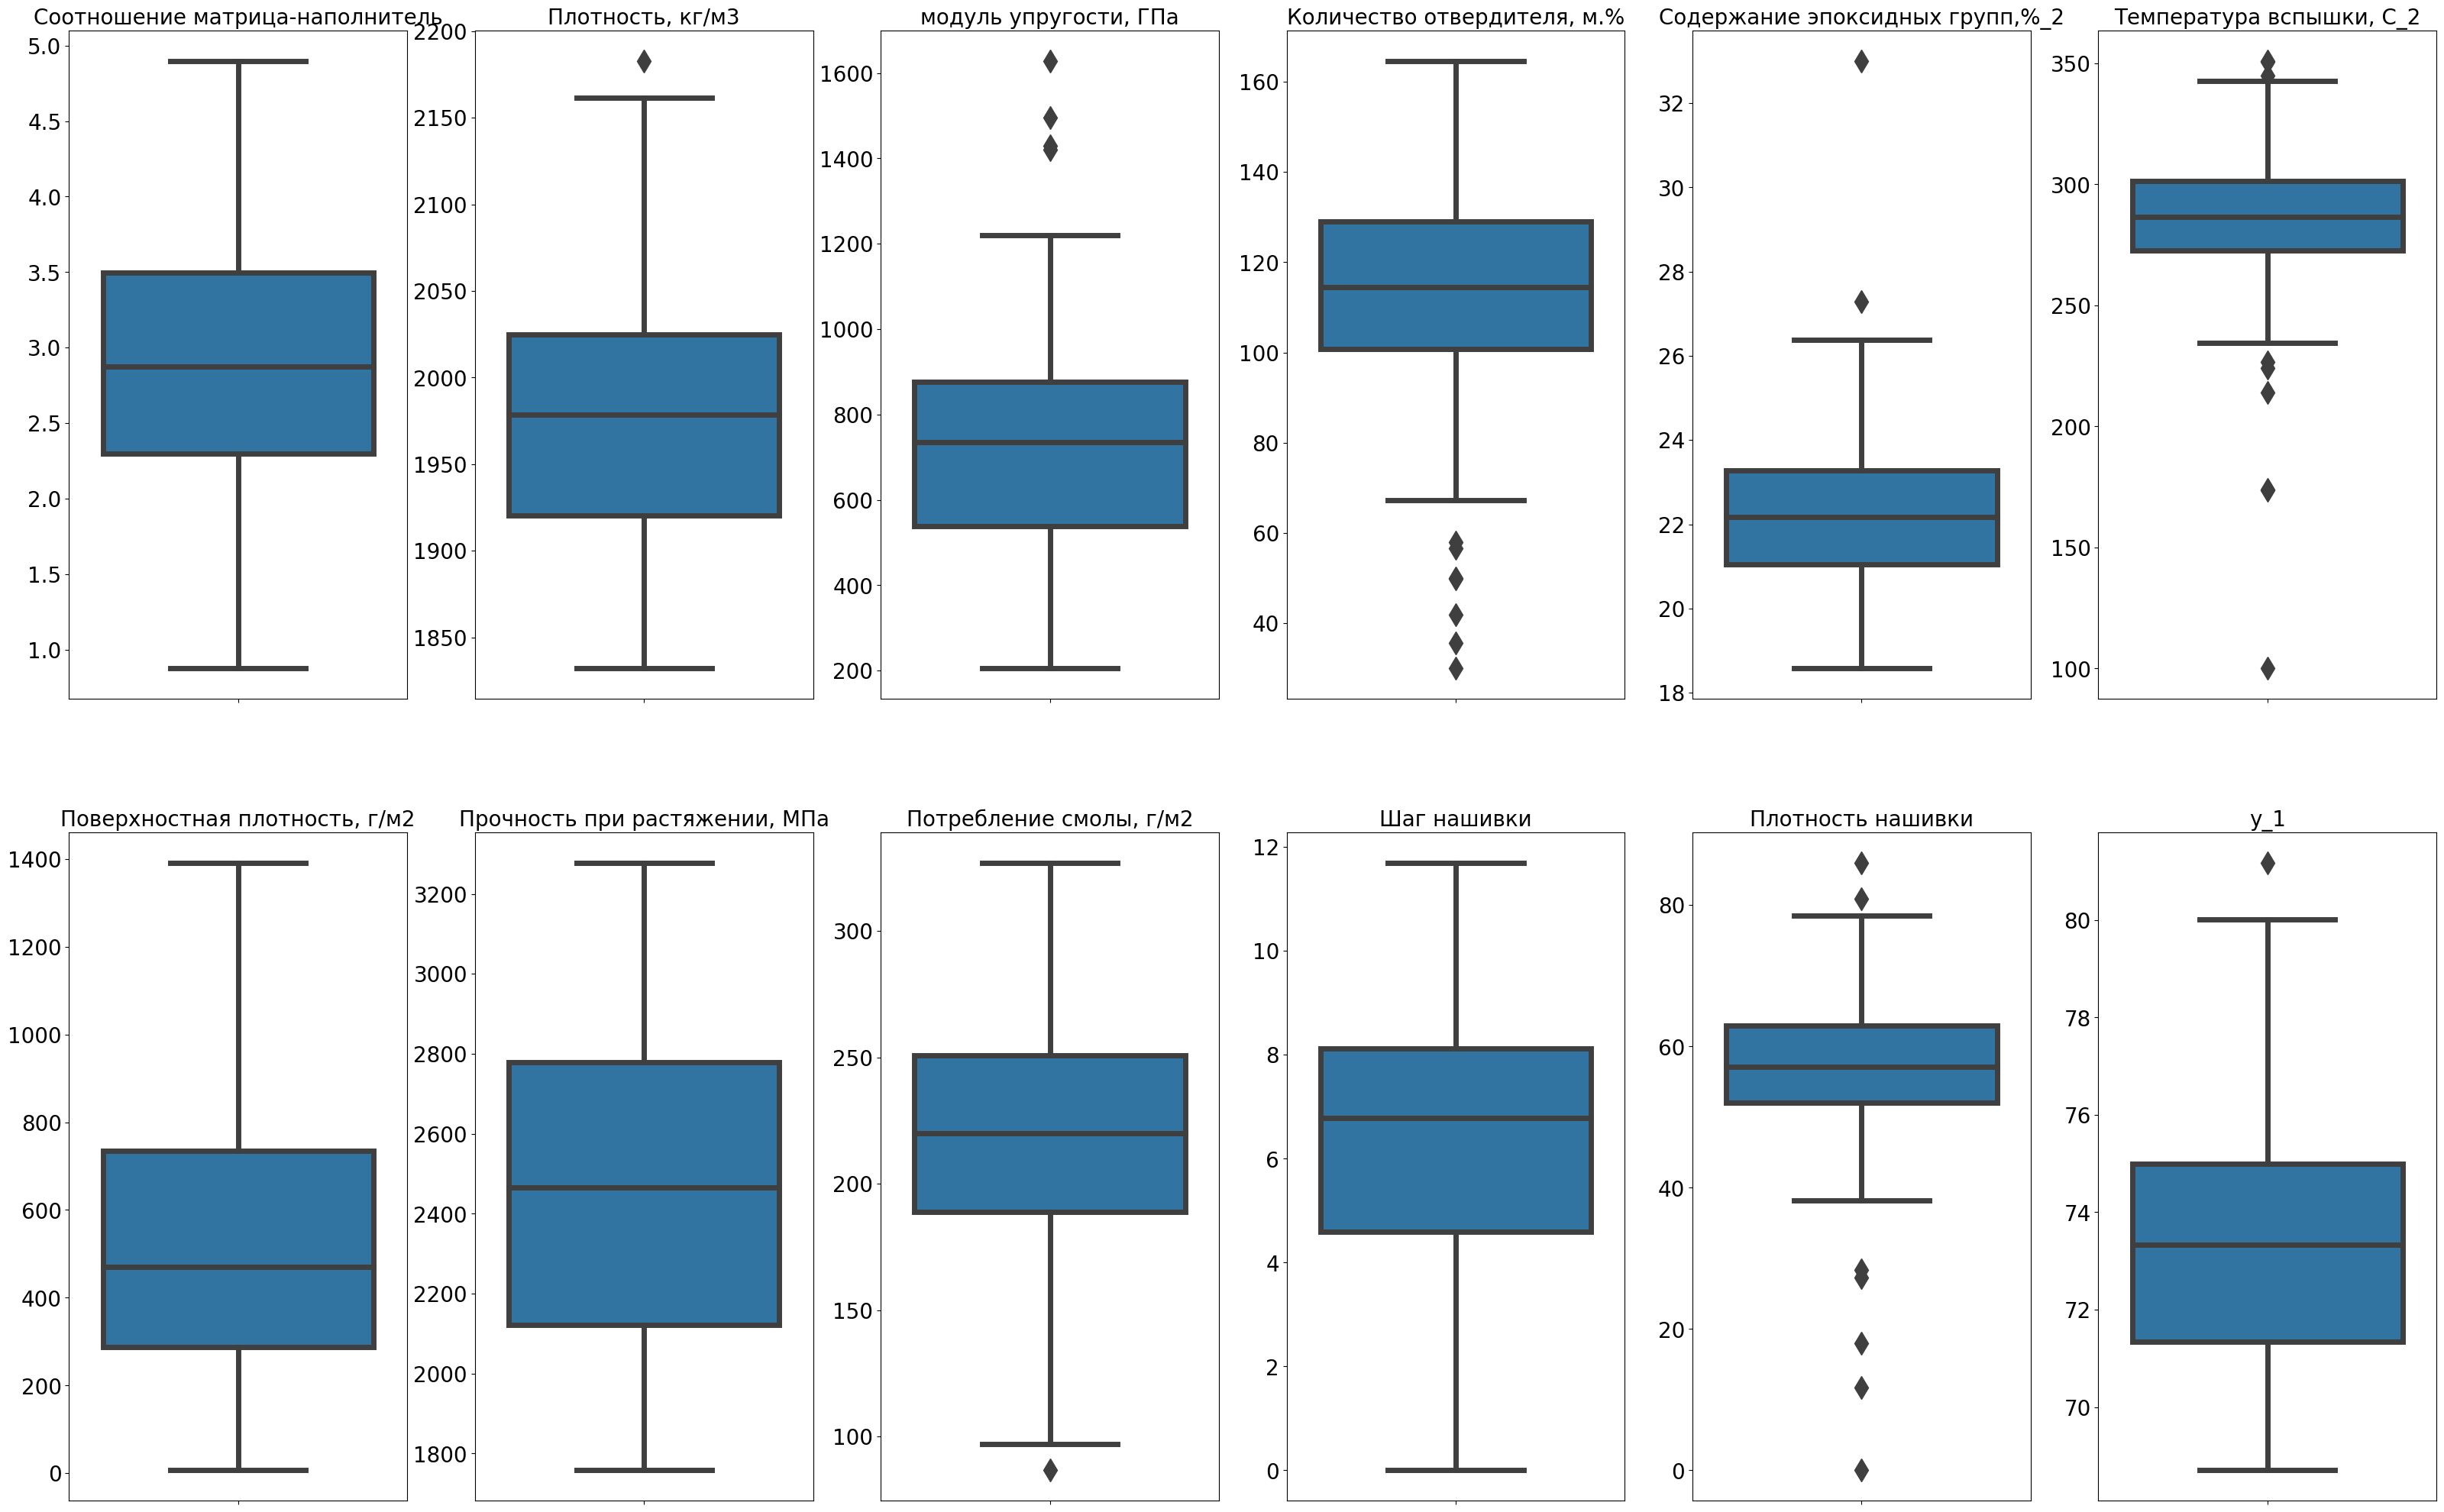

In [9]:
plt.figure(figsize=(40, 25))

for i, col in enumerate(df.drop('Угол нашивки, град', axis=1), start=1):
    plt.subplot(2, 6, i)
    sns.boxplot(data=df, y=col, fliersize=15, linewidth=5)
    # plt.setp(plt.gca().get_xticklabels(), fontsize=8)
    plt.setp(plt.gca().get_yticklabels(), fontsize=20)
    plt.title(col, size=20)
    plt.ylabel(None)

In [10]:
# sns.pairplot(df, kind="reg")
# plt.show()

3.2 Приведение к нормальному распределению (методом Йео-Джонсона)

In [11]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
columns_to_transform = df.columns.difference(['y_1', 'Угол нашивки, град'])
df[columns_to_transform] = pt.fit_transform(df[columns_to_transform])

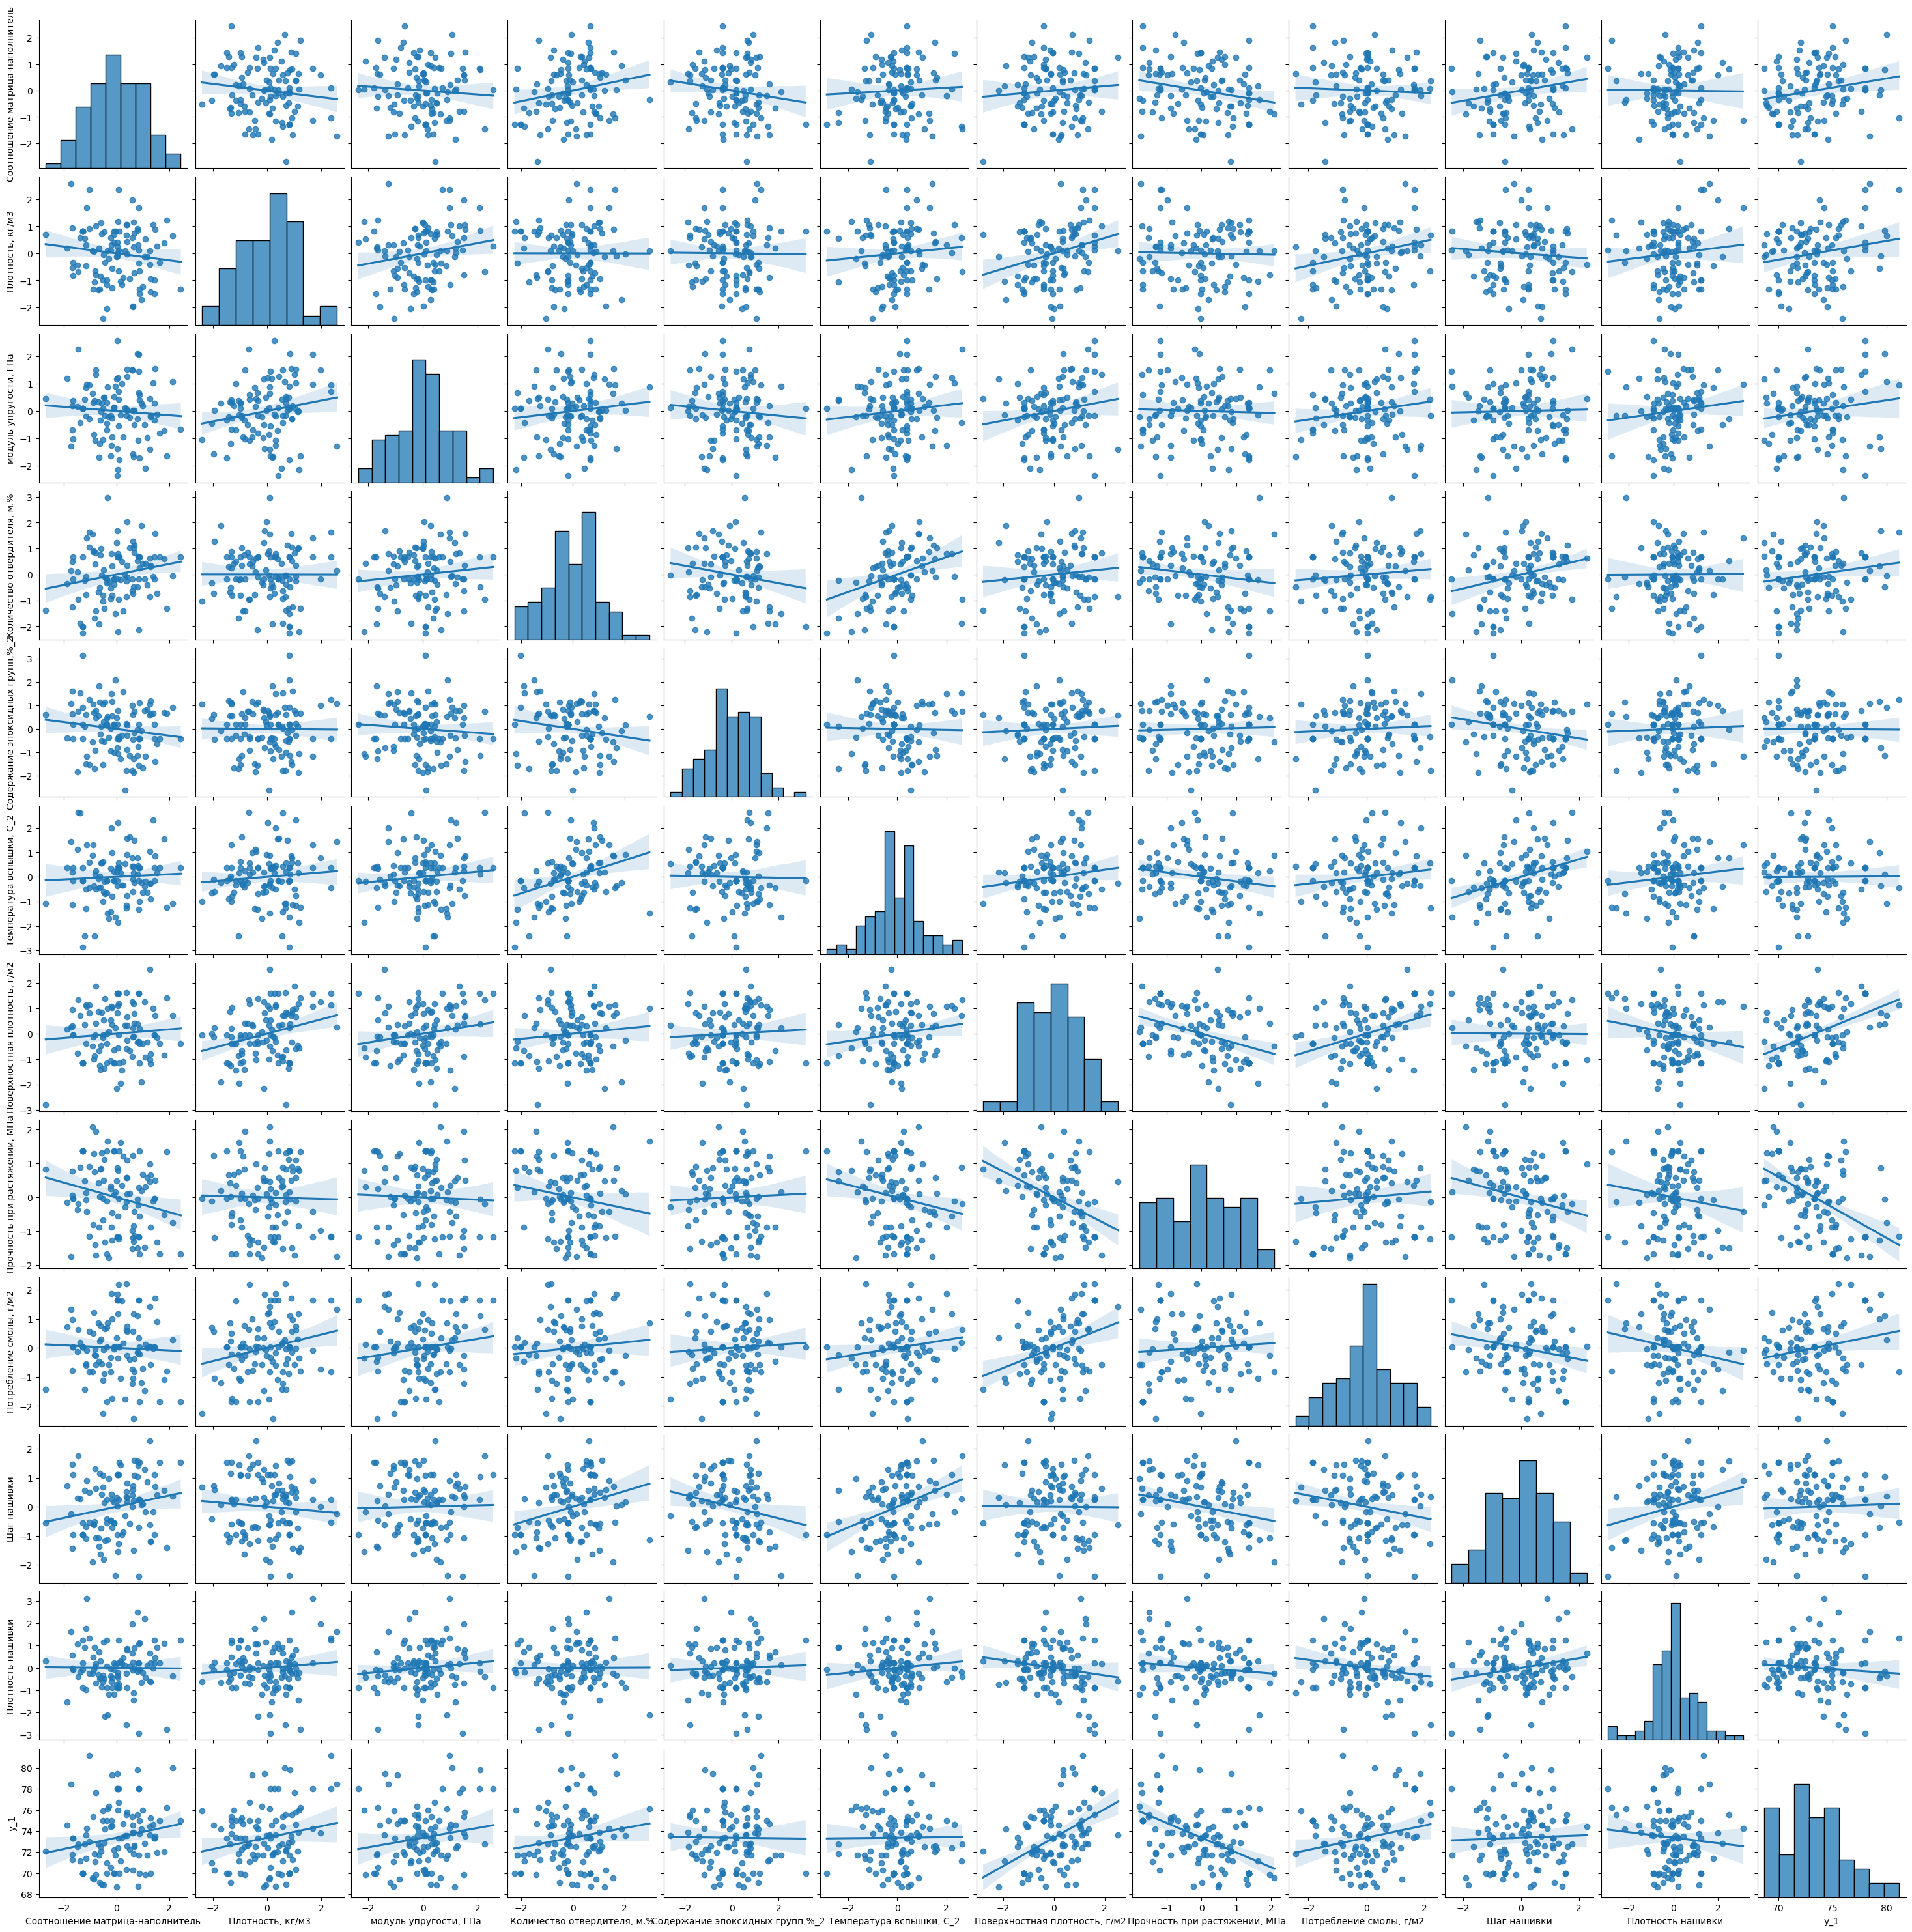

In [12]:
sns.pairplot(df.drop('Угол нашивки, град', axis=1), kind="reg")
plt.show()

4 Отбор признаков

In [13]:
x_0 = 'Соотношение матрица-наполнитель'
x_1 = 'Плотность, кг/м3'
x_2 = 'модуль упругости, ГПа'
x_3 = 'Количество отвердителя, м.%'
x_4 = 'Содержание эпоксидных групп,%_2'
x_5 = 'Температура вспышки, С_2'
x_6 = 'Поверхностная плотность, г/м2'
x_7 = 'Модуль упругости при растяжении, ГПа'
x_8 = 'Прочность при растяжении, МПа'
x_9 = 'Потребление смолы, г/м2'
x_10 = 'Угол нашивки, град'
x_11 = 'Шаг нашивки'
x_12 = 'Плотность нашивки'

4.1 Корреляционные матрицы

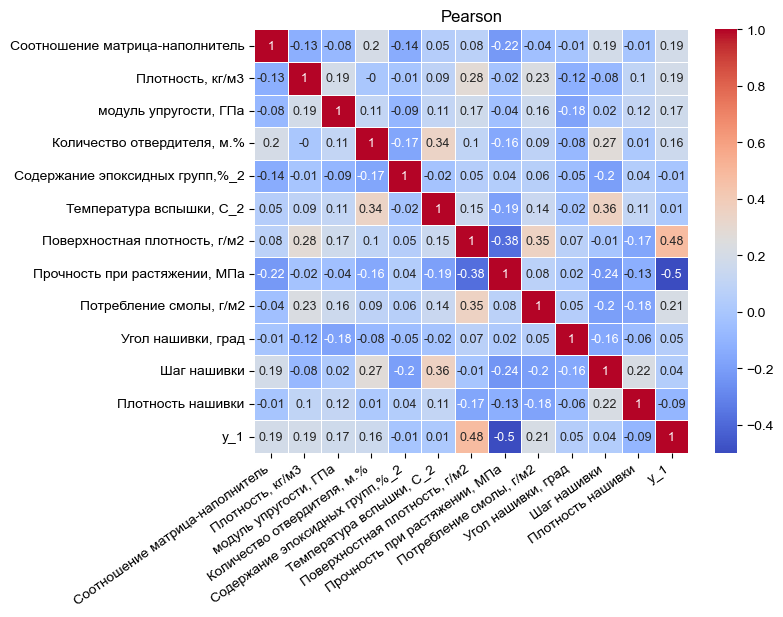

In [14]:
matrix = np.triu(df.corr())
plt.figure(figsize=(7, 5.5))
sns.heatmap(df.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

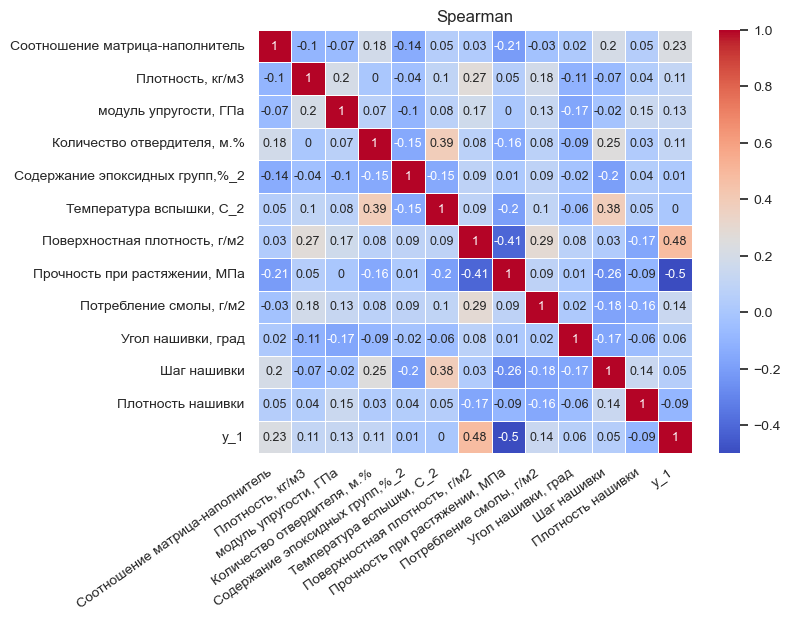

In [15]:
matrix = np.triu(df.corr())
plt.figure(figsize=(7, 5.5))
sns.heatmap(df.corr(method='spearman').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Spearman')
plt.show()

4.2 Вычисление (прогноз) коэффициента детерминации по коэф. корреляции:  $R^2 = 1 - \frac{detA^+}{detA}$

In [16]:
corr_matrix_p = df.corr(method='pearson')
corr_matrix_s = df.corr(method='spearman')
# коэффициенты корреляции между y и x
corr_yx_p = corr_matrix_p['y_1'][:-1]
corr_yx_s = corr_matrix_s['y_1'][:-1]
# коэффициенты парной корреляции между x
corr_x_p = np.delete(np.array(corr_matrix_p), -1, axis=0)[:, :-1]
corr_x_s = np.delete(np.array(corr_matrix_s), -1, axis=0)[:, :-1]

det_r_yx_p = np.linalg.det(corr_matrix_p)
det_r_x_p = np.linalg.det(corr_matrix_p.iloc[:-1, :-1])
R2_P = 1 - det_r_yx_p / det_r_x_p

det_r_yx_s = np.linalg.det(corr_matrix_s)
det_r_x_s = np.linalg.det(corr_matrix_s.iloc[:-1, :-1])
R2_S = 1 - det_r_yx_s / det_r_x_s
print()
print(f"Прогноз коэф. детерминации R2 Pearson:  {R2_P.round(3)}")
print(f"Прогноз коэф. детерминации R2 Spearman: {R2_S.round(3)}")


Прогноз коэф. детерминации R2 Pearson:  0.434
Прогноз коэф. детерминации R2 Spearman: 0.408


In [17]:
X_1 = df.copy()
y_1 = X_1.pop('y_1')

4.3 Анализ значимости признаков

MI - показатель значимости любого (линейного и нелинейного) влияния признака (чем MI больше, тем больше признак влияет на целевую переменную);            
corr - коэф. корреляции Пирсона;                                                                                                                            
f - показатель значимости линейного влияния признака (чем f больше, тем больше признак влияет на целевую переменную);                                       
p - вероятность того, что целевая переменная не зависит от признака (показывает насколько верна гипотеза H0: "признак не влияет на целевую переменную")

In [18]:
mi_full = mutual_info_regression(X_1, y_1, random_state=2023)
f_full = f_regression(X_1, y_1)
f_p_full = pd.DataFrame({'MI':mi_full, 'corr':X_1.corrwith(y_1), 'f':f_full[0], 'p':f_full[1]}, index=X_1.columns)
f_p_full.round(3)

,MI,corr,f,p
Соотношение матрица-наполнитель,0.002,0.193,4.083,0.046
"Плотность, кг/м3",0.171,0.194,4.144,0.044
"модуль упругости, ГПа",0.039,0.165,2.981,0.087
"Количество отвердителя, м.%",0.121,0.163,2.896,0.092
"Содержание эпоксидных групп,%_2",0.147,-0.010,0.010,0.920
"Температура вспышки, С_2",0.173,0.009,0.008,0.929
"Поверхностная плотность, г/м2",0.716,0.484,32.375,0.000
"Прочность при растяжении, МПа",0.623,-0.504,36.049,0.000
"Потребление смолы, г/м2",0.491,0.207,4.762,0.031
"Угол нашивки, град",0.000,0.051,0.279,0.599


4.4 Анализ мультиколлинеарности признаков

In [19]:
def vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        R2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - R2
        vif[feature] = 1 / (tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
vif(df = df, features = df.columns)

,VIF,Tolerance
Соотношение матрица-наполнитель,1.163605,0.859398
"Плотность, кг/м3",1.268380,0.788407
"модуль упругости, ГПа",1.188532,0.841374
"Количество отвердителя, м.%",1.262901,0.791828
"Содержание эпоксидных групп,%_2",1.130978,0.884190
"Температура вспышки, С_2",1.389519,0.719673
"Поверхностная плотность, г/м2",1.714606,0.583224
"Прочность при растяжении, МПа",1.736477,0.575879
"Потребление смолы, г/м2",1.363045,0.733651
"Угол нашивки, град",1.135179,0.880918


4.5 Пошаговый отбор признаков (stepwise regression)

In [20]:
backselect = step_reg.backward_regression(X_1, y_1, 0.05, verbose=False)
forwardselect = step_reg.forward_regression(X_1, y_1, 0.05, verbose=False)
print(backselect)
print(forwardselect)

['Поверхностная плотность, г/м2', 'Прочность при растяжении, МПа']
['Прочность при растяжении, МПа', 'Поверхностная плотность, г/м2']


#### В результате пошагового отбора рассматриваем следующие признаки:

In [21]:
df = df.loc[:, [x_0, x_1, x_2, x_3, x_6, x_8, x_9, 'y_1']]

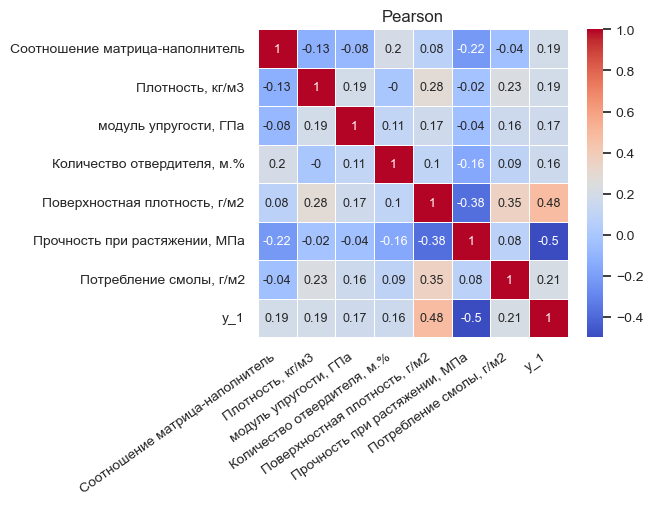

In [22]:
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

5 Разделение датасета на train и test, масштабирование

In [23]:
X_1 = df.drop(['y_1'], axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_1, # X_poly - если использовать полиномиальную регрессию
                                                    y_1,
                                                    test_size=0.3,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(75, 7)
(33, 7)


In [25]:
sc = RobustScaler()    # MinMaxScaler()    RobustScaler()    StandardScaler()
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.transform(X_test)

6 Вычисление (прогноз) коэффициента детерминации по коэф. корреляции Пирсона:  $R^2 = 1 - \frac{detA^+}{detA}$

In [26]:
df_train = pd.DataFrame(data=X_train_std, columns=X_1.columns)
df_train['y_1'] = y_train.reset_index(drop=True)
df_test = pd.DataFrame(data=X_test_std, columns=X_1.columns)
df_test['y_1'] = y_test.reset_index(drop=True)

corr_matrix_train = df_train.corr(method='pearson')
corr_matrix_test = df_test.corr(method='pearson')

corr_yx_train = corr_matrix_train['y_1'][:-1]    # коэффициенты корреляции между y и x
corr_yx_test = corr_matrix_test['y_1'][:-1]    # коэффициенты корреляции между y и x

corr_x_train = np.delete(np.array(corr_matrix_train), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x
corr_x_test = np.delete(np.array(corr_matrix_test), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x

det_r_yx_train = np.linalg.det(corr_matrix_train)
det_r_x_train = np.linalg.det(corr_matrix_train.iloc[:-1, :-1])
R2_train = 1 - det_r_yx_train / det_r_x_train
det_r_yx_test = np.linalg.det(corr_matrix_test)
det_r_x_test = np.linalg.det(corr_matrix_test.iloc[:-1, :-1])
R2_test = 1 - det_r_yx_test / det_r_x_test
print(f"Оценка R2 для full-выборки:  {R2_P.round(3)}")
print(f"Оценка R2 для train-выборки: {R2_train.round(3)}")
print(f"Оценка R2 для test-выборки:  {R2_test.round(3)}")

Оценка R2 для full-выборки:  0.434
Оценка R2 для train-выборки: 0.361
Оценка R2 для test-выборки:  0.512


#### 7 Обучение моделей

In [27]:
metrics = {}

7.1 LinearRegression

In [28]:
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)

y_lr_pred = model_lr.predict(X_test)
y_lr_pred_train = model_lr.predict(X_train)

rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_lr_pred_train)).round(3)
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_lr_pred)).round(3)
mae_lr_train = mean_absolute_error(y_train, y_lr_pred_train).round(3)
mae_lr_test = mean_absolute_error(y_test, y_lr_pred).round(3)
r2_lr_train = r2_score(y_train, y_lr_pred_train).round(3)
r2_lr_test = r2_score(y_test, y_lr_pred).round(3)
metrics['LinearRegression'] = (rmse_lr_train, rmse_lr_test, mae_lr_train, mae_lr_test, r2_lr_train, r2_lr_test)

print(f'RMSE train: {rmse_lr_train}')
print(f'RMSE test:  {rmse_lr_test}')
print()
print(f'MAE train:  {mae_lr_train}')
print(f'MAE test:   {mae_lr_test}')
print()
print(f'R2 train:   {r2_lr_train}')
print(f'R2 test:    {r2_lr_test}')
print()
print('Коэффициенты регрессии:')
print(pd.DataFrame(model_lr.coef_[:], index=X_1.columns, columns=['k']).round(5))
print()
print(f'Свободный член регрессии  a0 =  {model_lr.intercept_.round(3)}')

RMSE train: 2.235
RMSE test:  2.085

MAE train:  1.743
MAE test:   1.578

R2 train:   0.361
R2 test:    0.408

Коэффициенты регрессии:
                                       k
Соотношение матрица-наполнитель  0.15434
Плотность, кг/м3                 0.17323
модуль упругости, ГПа            0.27436
Количество отвердителя, м.%      0.12933
Поверхностная плотность, г/м2    0.76684
Прочность при растяжении, МПа   -1.10500
Потребление смолы, г/м2          0.25258

Свободный член регрессии  a0 =  73.192


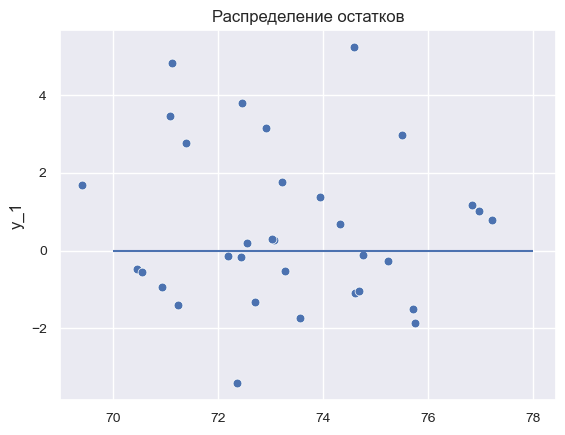

In [29]:
sns.scatterplot(x = y_lr_pred, y = y_test - y_lr_pred, s = 40)
plt.hlines(y = 0, xmin = 70, xmax = 78)
plt.title('Распределение остатков')
plt.show()

7.2 ElasticNet

In [30]:
en = ElasticNet()
en_parameters = {'alpha': (0.01, 0.03, 0.1, 0.3, 1, 3, 10), 
                 'l1_ratio': (0.05, 0.1, 0.3, 0.5, 0.7, 0.9),
                 'random_state':[1, 7, 42, 100]
}
model_en = GridSearchCV(estimator=en,
                   param_grid=en_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_en.fit(X_train_std, y_train)

y_en_pred = model_en.predict(X_test_std)
y_en_pred_train = model_en.predict(X_train_std)

rmse_en_train = np.sqrt(mean_squared_error(y_train, y_en_pred_train)).round(3)
rmse_en_test = np.sqrt(mean_squared_error(y_test, y_en_pred)).round(3)
mae_en_train = mean_absolute_error(y_train, y_en_pred_train).round(3)
mae_en_test = mean_absolute_error(y_test, y_en_pred).round(3)
r2_en_train = r2_score(y_train, y_en_pred_train).round(3)
r2_en_test = r2_score(y_test, y_en_pred).round(3)
metrics['ElasticNet'] = (rmse_en_train, rmse_en_test, mae_en_train, mae_en_test, r2_en_train, r2_en_test)

print(f'RMSE train: {rmse_en_train}')
print(f'RMSE test:  {rmse_en_test}')
print()
print(f'MAE train:  {mae_en_train}')
print(f'MAE test:   {mae_en_test}')
print()
print(f'R2 train:   {r2_en_train}')
print(f'R2 test:    {r2_en_test}')
model_en.best_params_

RMSE train: 2.35
RMSE test:  2.302

MAE train:  1.882
MAE test:   1.785

R2 train:   0.293
R2 test:    0.278


{'alpha': 0.3, 'l1_ratio': 0.9, 'random_state': 1}

7.3 GradientBoostingRegressor

In [31]:
gbr = GradientBoostingRegressor()
gbr_parameters = {
    'n_estimators' : range(100, 600, 100),
    'criterion' : ['friedman_mse', 'squared_error'],
    'max_depth' : range(1, 8),
    'min_samples_leaf' : range(2, 4),
    'min_samples_split' : range(4, 8, 2),
    'random_state':[1147, 7, 42, 100]
}
model_gbr = GridSearchCV(estimator=gbr,
                   param_grid=gbr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_gbr.fit(X_train_std, y_train)

y_gbr_pred = model_gbr.predict(X_test_std)
y_gbr_pred_train = model_gbr.predict(X_train_std)

rmse_gbr_train = np.sqrt(mean_squared_error(y_train, y_gbr_pred_train)).round(3)
rmse_gbr_test = np.sqrt(mean_squared_error(y_test, y_gbr_pred)).round(3)
mae_gbr_train = mean_absolute_error(y_train, y_gbr_pred_train).round(3)
mae_gbr_test = mean_absolute_error(y_test, y_gbr_pred).round(3)
r2_gbr_train = r2_score(y_train, y_gbr_pred_train).round(3)
r2_gbr_test = r2_score(y_test, y_gbr_pred).round(3)
metrics['GradientBoosting'] = (rmse_gbr_train, rmse_gbr_test, mae_gbr_train, mae_gbr_test, r2_gbr_train, r2_gbr_test)

print(f'RMSE train: {rmse_gbr_train}')
print(f'RMSE test:  {rmse_gbr_test}')
print()
print(f'MAE train:  {mae_gbr_train}')
print(f'MAE test:   {mae_gbr_test}')
print()
print(f'R2 train:   {r2_gbr_train}')
print(f'R2 test:    {r2_gbr_test}')
model_gbr.best_params_

RMSE train: 1.606
RMSE test:  1.936

MAE train:  1.263
MAE test:   1.358

R2 train:   0.67
R2 test:    0.49


{'criterion': 'friedman_mse',
 'max_depth': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100,
 'random_state': 1147}

7.4 RandomForestRegressor

In [32]:
rfr = RandomForestRegressor()
rfr_parameters = {
    'n_estimators' : range(100, 400, 100),
    'criterion' : ['squared_error', 'absolute_error'],
    'max_depth' : range(1, 8),
    'min_samples_leaf' : range(2, 4),
    'min_samples_split' : range(4, 8, 2),
    'random_state':[1, 7, 42, 1147]
}
model_rfr = GridSearchCV(estimator=rfr,
                   param_grid=rfr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_rfr.fit(X_train_std, y_train)

y_rfr_pred = model_rfr.predict(X_test_std)
y_rfr_pred_train = model_rfr.predict(X_train_std)

rmse_rfr_train = np.sqrt(mean_squared_error(y_train, y_rfr_pred_train)).round(3)
rmse_rfr_test = np.sqrt(mean_squared_error(y_test, y_rfr_pred)).round(3)
mae_rfr_train = mean_absolute_error(y_train, y_rfr_pred_train).round(3)
mae_rfr_test = mean_absolute_error(y_test, y_rfr_pred).round(3)
r2_rfr_train = r2_score(y_train, y_rfr_pred_train).round(3)
r2_rfr_test = r2_score(y_test, y_rfr_pred).round(3)
metrics['RandomForest'] = (rmse_rfr_train, rmse_rfr_test, mae_rfr_train, mae_rfr_test, r2_rfr_train, r2_rfr_test)

print(f'RMSE train: {rmse_rfr_train}')
print(f'RMSE test:  {rmse_rfr_test}')
print()
print(f'MAE train:  {mae_rfr_train}')
print(f'MAE test:   {mae_rfr_test}')
print()
print(f'R2 train:   {r2_rfr_train}')
print(f'R2 test:    {r2_rfr_test}')
model_rfr.best_params_

RMSE train: 2.094
RMSE test:  2.209

MAE train:  1.58
MAE test:   1.555

R2 train:   0.439
R2 test:    0.335


{'criterion': 'absolute_error',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 300,
 'random_state': 7}

7.5 KNeighborsRegressor

In [33]:
knr = KNeighborsRegressor()
knr_parameters = {'n_neighbors' : range(1, 101, 2), 
          # 'weights' : ['uniform', 'distance'],
          # 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
model_knr = GridSearchCV(estimator=knr,
                   param_grid=knr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_knr.fit(X_train_std, y_train)

y_knr_pred = model_knr.predict(X_test_std)
y_knr_pred_train = model_knr.predict(X_train_std)

rmse_knr_train = np.sqrt(mean_squared_error(y_train, y_knr_pred_train)).round(3)
rmse_knr_test = np.sqrt(mean_squared_error(y_test, y_knr_pred)).round(3)
mae_knr_train = mean_absolute_error(y_train, y_knr_pred_train).round(3)
mae_knr_test = mean_absolute_error(y_test, y_knr_pred).round(3)
r2_knr_train = r2_score(y_train, y_knr_pred_train).round(3)
r2_knr_test = r2_score(y_test, y_knr_pred).round(3)
metrics['KNeighbors'] = (rmse_knr_train, rmse_knr_test, mae_knr_train, mae_knr_test, r2_knr_train, r2_knr_test)

print(f'RMSE train: {rmse_knr_train}')
print(f'RMSE test:  {rmse_knr_test}')
print()
print(f'MAE train:  {mae_knr_train}')
print(f'MAE test:   {mae_knr_test}')
print()
print(f'R2 train:   {r2_knr_train}')
print(f'R2 test:    {r2_knr_test}')
model_knr.best_params_

RMSE train: 2.293
RMSE test:  2.348

MAE train:  1.779
MAE test:   1.884

R2 train:   0.327
R2 test:    0.249


{'n_neighbors': 11}

7.6 TheilSenRegressor

In [34]:
tsr = TheilSenRegressor()
tsr_parameters = {
    'random_state':[1, 7, 42, 100]
}
model_tsr = GridSearchCV(estimator=tsr,
                   param_grid=tsr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_tsr.fit(X_train_std, y_train)

y_tsr_pred = model_tsr.predict(X_test_std)
y_tsr_pred_train = model_tsr.predict(X_train_std)

rmse_tsr_train = np.sqrt(mean_squared_error(y_train, y_tsr_pred_train)).round(3)
rmse_tsr_test = np.sqrt(mean_squared_error(y_test, y_tsr_pred)).round(3)
mae_tsr_train = mean_absolute_error(y_train, y_tsr_pred_train).round(3)
mae_tsr_test = mean_absolute_error(y_test, y_tsr_pred).round(3)
r2_tsr_train = r2_score(y_train, y_tsr_pred_train).round(3)
r2_tsr_test = r2_score(y_test, y_tsr_pred).round(3)
metrics['TheilSen'] = (rmse_tsr_train, rmse_tsr_test, mae_tsr_train, mae_tsr_test, r2_tsr_train, r2_tsr_test)

print(f'RMSE train: {rmse_tsr_train}')
print(f'RMSE test:  {rmse_tsr_test}')
print()
print(f'MAE train:  {mae_tsr_train}')
print(f'MAE test:   {mae_tsr_test}')
print()
print(f'R2 train:   {r2_tsr_train}')
print(f'R2 test:    {r2_tsr_test}')
model_tsr.best_params_

RMSE train: 2.291
RMSE test:  2.309

MAE train:  1.721
MAE test:   1.681

R2 train:   0.328
R2 test:    0.273


{'random_state': 7}

8. Сводная таблица метрик моделей

In [35]:
df_metrics = pd.DataFrame(metrics)
df_metrics.index = ['RMSE train', 'RMSE test', 'MAE train', 'MAE test', 'R2 train', 'R2 test']
df_metrics

,LinearRegression,ElasticNet,GradientBoosting,RandomForest,KNeighbors,TheilSen
RMSE train,2.235,2.350,1.606,2.094,2.293,2.291
RMSE test,2.085,2.302,1.936,2.209,2.348,2.309
MAE train,1.743,1.882,1.263,1.580,1.779,1.721
MAE test,1.578,1.785,1.358,1.555,1.884,1.681
R2 train,0.361,0.293,0.670,0.439,0.327,0.328
R2 test,0.408,0.278,0.490,0.335,0.249,0.273


9. Доверительный интервал для предсказаний лучшей модели

In [36]:
y_pred = y_gbr_pred

In [37]:
n = len(y_test)
p = len(X_test_std[0])
se = np.sqrt(np.sum((y_test - y_pred)**2) / (n - p))

# Уровень доверия
confidence_level = 0.95
t_value = stats.t.ppf((1 + confidence_level) / 2, n - p)

lower = y_pred - t_value * se
upper = y_pred + t_value * se

y_test = y_test.values
print("Доверительный интервал для прогноза:")
print(f"Нижняя граница:  {lower[:12].round(2)}")
print(f"y_test:          {y_test[:12].round(2)}")
print(f"y_pred:          {y_pred[:12].round(2)}")
print(f"Верхняя граница: {upper[:12].round(2)}")
print()
print(f"Разброс тестовых значений:       {y_test.min().round(2)}; {y_test.max().round(2)}")
print(f"Разброс предсказанных значений:  {y_pred.min().round(2)}; {y_pred.max().round(2)}")
print()
print(f"Наименьшая нижняя граница доверительного интервала:  {lower.min().round(2)}")
print(f"Набольшая верхняя граница доверительного интервала:  {upper.max().round(2)}")

Доверительный интервал для прогноза:
Нижняя граница:  [70.95 73.05 66.04 67.84 70.27 69.26 66.21 68.23 68.66 72.99 70.34 70.47]
y_test:          [78.47 78.   70.   76.24 74.17 79.83 71.12 71.37 72.75 78.   73.51 76.07]
y_pred:          [75.43 77.53 70.52 72.32 74.76 73.75 70.69 72.72 73.14 77.47 74.82 74.95]
Верхняя граница: [79.92 82.01 75.01 76.8  79.24 78.23 75.18 77.2  77.63 81.96 79.31 79.43]

Разброс тестовых значений:       68.95; 79.83
Разброс предсказанных значений:  69.71; 77.89

Наименьшая нижняя граница доверительного интервала:  65.23
Набольшая верхняя граница доверительного интервала:  82.37


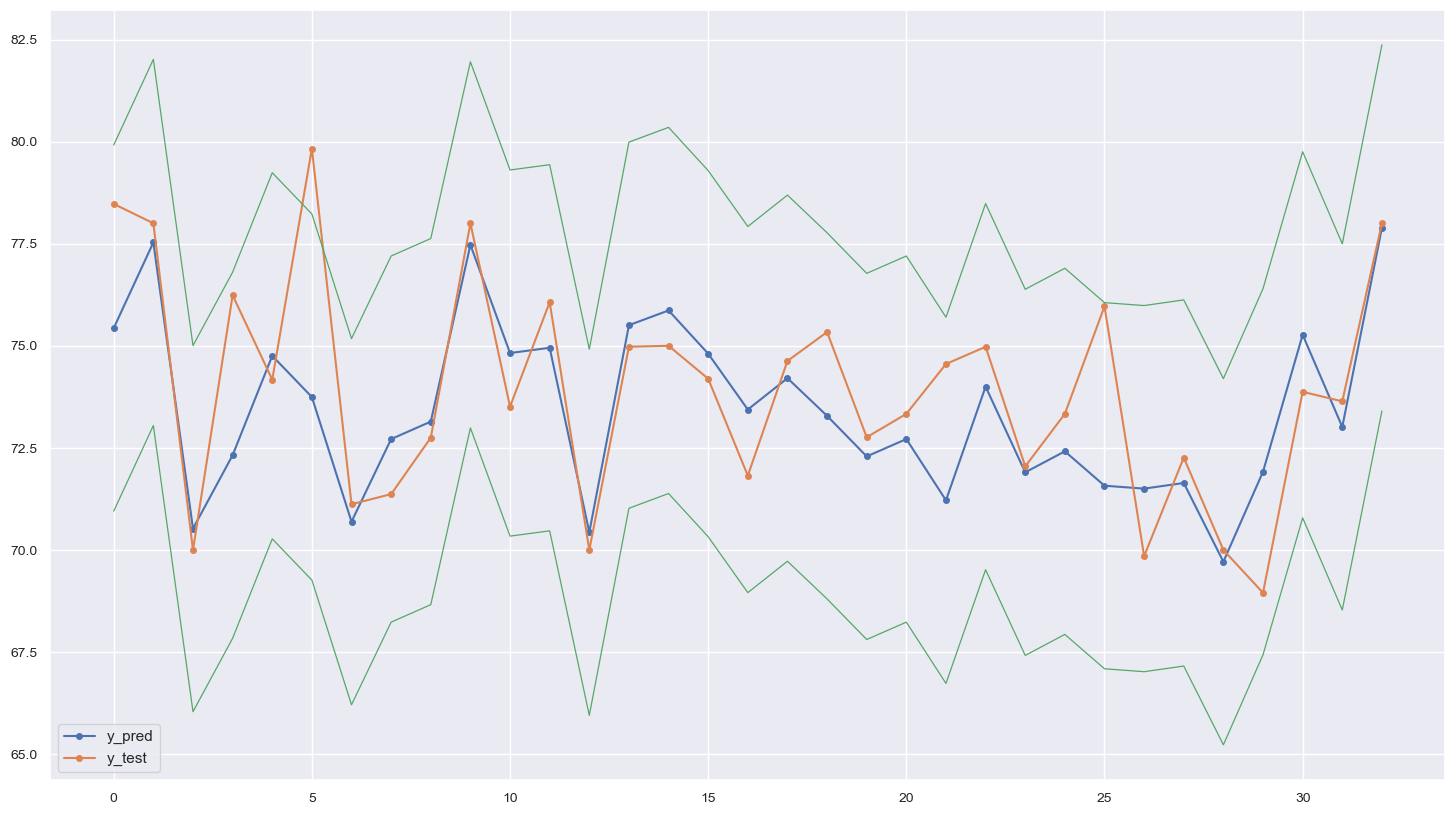

In [38]:
plt.figure(figsize=(18, 10))
plt.plot(y_pred, label='y_pred', marker='o', markersize=4)
plt.plot(y_test, label='y_test', marker='o', markersize=4)
plt.plot(lower, linewidth = 0.9, color='g')
plt.plot(upper, linewidth = 0.9, color='g')
plt.legend()
plt.grid(True)
plt.show()

Дополнение. Сравнение метрик различных регрессоров с использованием LazyRegressor

In [40]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_std, X_test_std, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 20.44it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
BaggingRegressor                             0.44       0.56  1.79        0.03
RandomForestRegressor                        0.29       0.45  2.02        0.14
ExtraTreesRegressor                          0.27       0.43  2.05        0.09
PoissonRegressor                             0.25       0.41  2.08        0.01
RidgeCV                                      0.24       0.41  2.08        0.01
Ridge                                        0.24       0.41  2.08        0.01
TransformedTargetRegressor                   0.24       0.41  2.08        0.01
LinearRegression                             0.24       0.41  2.08        0.01
Lars                                         0.24       0.41  2.08        0.02
BayesianRidge                                0.23       0.40  2.09        0.02
SGDRegressor                                 0.23   

In [41]:
br = BaggingRegressor()

br_parameters = {'n_estimators':range(20, 100, 10), 
                 'random_state':[1, 7, 42, 100]
}
model_br = GridSearchCV(estimator=br,
                   param_grid=br_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_br.fit(X_train_std, y_train)

y_br_pred = model_br.predict(X_test_std)
y_br_pred_train = model_br.predict(X_train_std)

rmse_br_train = np.sqrt(mean_squared_error(y_train, y_br_pred_train)).round(3)
rmse_br_test = np.sqrt(mean_squared_error(y_test, y_br_pred)).round(3)
mae_br_train = mean_absolute_error(y_train, y_br_pred_train).round(3)
mae_br_test = mean_absolute_error(y_test, y_br_pred).round(3)
r2_br_train = r2_score(y_train, y_br_pred_train).round(3)
r2_br_test = r2_score(y_test, y_br_pred).round(3)
metrics['BaggingRegressor'] = (rmse_br_train, rmse_br_test, mae_br_train, mae_br_test, r2_br_train, r2_br_test)

print(f'RMSE train: {rmse_br_train}')
print(f'RMSE test:  {rmse_br_test}')
print()
print(f'MAE train:  {mae_br_train}')
print(f'MAE test:   {mae_br_test}')
print()
print(f'R2 train:   {r2_br_train}')
print(f'R2 test:    {r2_br_test}')
model_br.best_params_

RMSE train: 0.981
RMSE test:  2.017

MAE train:  0.723
MAE test:   1.413

R2 train:   0.877
R2 test:    0.446


{'n_estimators': 40, 'random_state': 42}